Epoch 0, Loss: 1.0651832365432075
Epoch 100, Loss: 0.0486510756880145
Epoch 200, Loss: 0.006889772844981585
Epoch 300, Loss: 0.0024840227403602148
Epoch 400, Loss: 0.0015956429970784044
Epoch 500, Loss: 0.002744217284886544
Epoch 600, Loss: 0.0028796121891377234
Epoch 700, Loss: 0.0015728780835753407
Epoch 800, Loss: 0.005636664527952242
Epoch 900, Loss: 0.005232246479120726


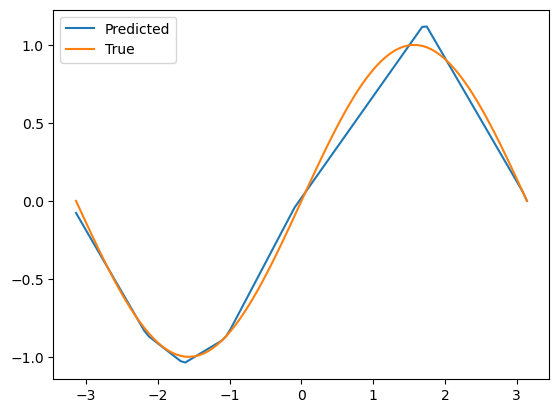

In [30]:
import numpy as np

# ReLU激活函数及其导数
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 均方误差损失函数及其导数
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# 两层ReLU网络
class TwoLayerReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # 初始化权重和偏置
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward(self, x):
        # 前向传播
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.final_input  # 输出层没有激活函数
        return self.final_output

    def backward(self, x, y_true):
        # 反向传播
        # 计算输出层误差
        error_output = mse_derivative(y_true, self.final_output)
        delta_output = error_output

        # 计算隐藏层误差
        error_hidden = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * relu_derivative(self.hidden_input)

        # 更新权重和偏置
        self.weights_hidden_output -= self.learning_rate * self.hidden_output.T.dot(delta_output)
        self.bias_output -= self.learning_rate * np.sum(delta_output, axis=0, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * x.T.dot(delta_hidden)
        self.bias_hidden -= self.learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    def train(self, x_train, y_train, epochs=1000):
        for epoch in range(epochs):
            for x, y_true in zip(x_train, y_train):
                x = np.array([x])
                y_true = np.array([y_true])
                y_pred = self.forward(x)
                self.backward(x, y_true)

            if epoch % 100 == 0:
                loss = mse_loss(y_train, self.forward(x_train))
                print(f"Epoch {epoch}, Loss: {loss}")

# 示例：拟合正弦函数
if __name__ == "__main__":
    # 生成训练数据
    x_train = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
    y_train = np.sin(x_train)

    # 创建网络
    network = TwoLayerReLUNetwork(input_size=1, hidden_size=10, output_size=1, learning_rate=0.01)

    # 训练网络
    network.train(x_train, y_train, epochs=1000)

    # 测试
    x_test = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
    y_pred = network.forward(x_test)

    # 可视化结果
    import matplotlib.pyplot as plt
    plt.plot(x_test, y_pred, label="Predicted")
    plt.plot(x_test, np.sin(x_test), label="True")
    plt.legend()
    plt.show()